In [87]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# carregamento de dados e metadados
datai = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [61]:
# verificaçao colunas e linhas de dados e metadados
print(datai.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


**Análise de dados e metadados**

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [83]:
data=datai.transpose()


**Descrição e caracterização do dataset**

O objetivo deste estudo era investigar os efeitos de um jejum curto na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e análisadas em quatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar o valor total de RNA obtido com o jejum.

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição

In [63]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
hora             0
individuo        0
Length: 48109, dtype: int64

Total de valores em falta nos dados:
37632


In [64]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [65]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
ILMN_1343048    float64
ILMN_1343049    float64
ILMN_1343050    float64
ILMN_1343052    float64
ILMN_1343059    float64
                 ...   
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
hora             object
individuo        object
Length: 48109, dtype: object


In [66]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


**Características dos dados e metadados**

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

In [84]:
#pre-processamento dos dados
data.dropna(axis="columns", inplace=True)             #removem-se os valores nulos, dropna() remove as linhas que contêm valores nulos
data_scale = preprocessing.scale(data)
print(data_scale.shape)


(48, 47323)


**Passos do pré-processamento**

Primeiro, eliminaram-se os valores nulos com a função dropna(). Seguidamente, procedeu-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

**Escolha de variáveis de meta-dados**

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas serão utilizadas duas: "individual" e "time". As variáveis "sample" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

[6.00652010e-02 5.69230496e-02 3.82744447e-02 3.37939965e-02
 2.96700818e-02 2.91411319e-02 2.55861292e-02 2.49198978e-02
 2.34602566e-02 2.33634716e-02 2.28557326e-02 2.24160873e-02
 2.13367322e-02 2.12811765e-02 2.03312678e-02 2.02027770e-02
 2.00700632e-02 1.96958449e-02 1.92742287e-02 1.87673361e-02
 1.85293743e-02 1.83705203e-02 1.81618565e-02 1.80245655e-02
 1.78917138e-02 1.77861353e-02 1.76320580e-02 1.74164056e-02
 1.72243474e-02 1.71625092e-02 1.70850126e-02 1.68293419e-02
 1.67969827e-02 1.66771443e-02 1.64783409e-02 1.62990324e-02
 1.61840362e-02 1.60169198e-02 1.58985659e-02 1.58762825e-02
 1.57440996e-02 1.55792569e-02 1.54429585e-02 1.52827806e-02
 1.49580782e-02 1.48114916e-02 1.44112826e-02 4.65990700e-33]
0.9095141516999558


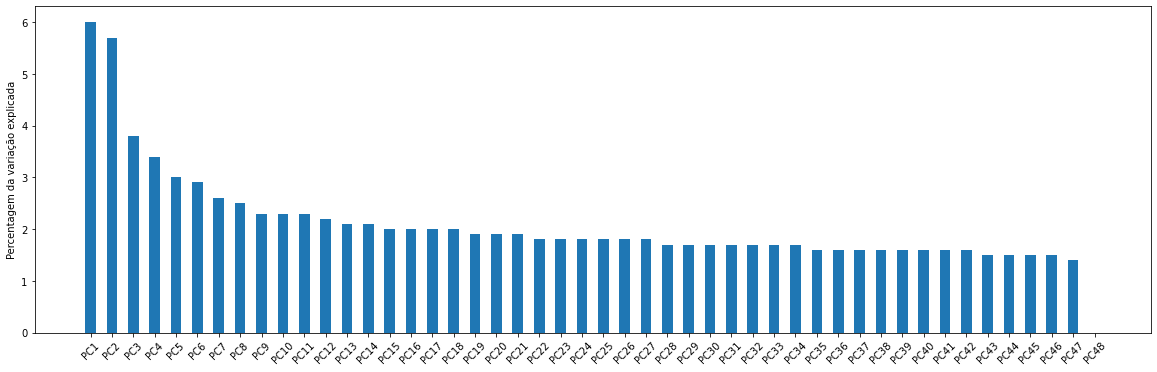

In [71]:
n=48                                                                # existem 48 amostras para proceder à análise
pca = PCA(n_components=n)
pca.fit(data_scale)                                                           # media e desvio
x_reduced = pca.transform(data_scale)                                         # escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:41]))                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

    
plt.show()


In [72]:
descricao=data.describe()

In [ ]:
print(descricao.iloc[3][1])


14.0


**SECÇAO 2**

Análise estatística

In [82]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, data['hora'], rownames=['clusters'] )

hora,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,0,2,6,0
1,6,7,3,7
2,4,2,3,4
3,2,1,0,1


**SECÇAO 3**

In [108]:
input_data = data.values
output_data = meta['time'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))
indices = np.random.permutation(len(input_data))
indices

train_in = input_sc[indices[:-16]]                #divisao entre dados de treino e dados de teste
train_out = output_data[indices[:-16]]
test_in  = input_sc[indices[-16:]]
test_out = output_data[indices[-16:]]

48


K-neighbors

In [109]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
from sklearn.metrics import accuracy_score
accuracy_score(preds_knn, test_out)

Valores previstos:  ['hour 10' 'hour 4' 'hour 10' 'hour 10' 'hour 10' 'hour 10' 'hour 1.5'
 'hour 10' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 10' 'hour 24']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.25

Tree descision

In [110]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
sum(preds_tree == test_out) / len(preds_tree)

Valores previstos:  ['hour 4' 'hour 4' 'hour 10' 'hour 10' 'hour 24' 'hour 4' 'hour 10'
 'hour 24' 'hour 10' 'hour 4' 'hour 10' 'hour 10' 'hour 1.5' 'hour 10'
 'hour 24' 'hour 10']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.625

Regressao Logistica

In [111]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000)
logistic = logistic.fit(train_in, train_out)
preds_logr = logistic.predict(test_in)

print("Valores previstos: " , preds_logr)
print("Valores reais: " , test_out)
sum(preds_logr == test_out) / len(preds_logr)

Valores previstos:  ['hour 1.5' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 10'
 'hour 24' 'hour 24' 'hour 1.5' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 10' 'hour 24']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.5625

SVM

In [112]:
from sklearn import svm

model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
sum(preds_svm == test_out) / len(preds_svm)

Valores previstos:  ['hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.125

Comparacao dos modelos

In [113]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree_model, input_sc, output_data, cv = 5)
print(scores_tree)
print(scores_tree.mean())

[0.5        0.8        0.6        0.44444444 0.55555556]
0.5799999999999998


In [114]:
scores_log = cross_val_score(logistic, input_sc, output_data, cv = 5)
print(scores_log)
print(scores_log.mean())

[0.5        0.6        0.8        0.66666667 0.55555556]
0.6244444444444446


In [115]:
scores_svm = cross_val_score(model_svm, input_sc, output_data, cv = 5)
print(scores_svm)
print(scores_svm.mean())

[0.3        0.1        0.2        0.11111111 0.22222222]
0.1866666666666667
